In [101]:
import kaggle as kg
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s

In [102]:
os.environ["USERNAME"] ="avdheshsingh02"
os.environ["KEY"] = "52ce86ec35a9087219ba70726bd130b3"

In [103]:
kg.api.authenticate()

In [104]:
kg.api.dataset_download_files(dataset= "ehtishamsadiq/uncleaned-laptop-price-dataset", path="./dataset", unzip = True)

Dataset URL: https://www.kaggle.com/datasets/ehtishamsadiq/uncleaned-laptop-price-dataset


In [105]:
data = pd.read_csv("dataset/laptopData.csv")

In [106]:
data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [107]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [108]:
data.isna().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [109]:
data.dropna(axis=0,inplace=True)

In [110]:
data.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [111]:
data.drop(labels=data.columns[0],axis=1,inplace=True)

In [112]:
data.shape

(1273, 11)

In [113]:
data.columns[0]

'Company'

In [114]:
def label_encode_column(column_name):

    data[column_name].unique()

    d = dict()
    for value in data[column_name].unique():
        d[value] = data[data[column_name] == value][data.columns[-1]].mean()

    input_target_df = pd.DataFrame(data={column_name:d.keys(),"Mean Price":d.values()})
    input_target_df.sort_values(by="Mean Price",inplace=True)
    input_target_df.reset_index(inplace=True,drop=True)

    data[column_name] = data[column_name].replace(to_replace=list(input_target_df[column_name]),
                              value=list(input_target_df.index)).infer_objects(copy=False)

In [115]:
categorical_columns = list(data.columns[0:2]) + list(data.columns[3:5]) + list(data.columns[6:9])

In [116]:
categorical_columns

['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

In [117]:
for column_name in categorical_columns:

    label_encode_column(column_name)

/tmp/ipykernel_19843/930716832.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column_name] = data[column_name].replace(to_replace=list(input_target_df[column_name]),


In [118]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,13,3,13.3,26,85,8GB,14,80,8,1.37kg,71378.6832
1,13,3,13.3,13,64,8GB,13,45,8,1.34kg,47895.5232
2,5,1,15.6,15,58,8GB,21,54,2,1.86kg,30636.0000
3,13,3,15.4,36,111,16GB,31,95,8,1.83kg,135195.3360
4,13,3,13.3,26,99,8GB,21,84,8,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,6,2,14,16,77,4GB,14,47,4,1.8kg,33992.6400
1299,6,2,13.3,22,77,16GB,31,47,4,1.3kg,79866.7200
1300,6,1,14,4,16,2GB,6,6,4,1.5kg,12201.1200
1301,5,1,15.6,4,77,6GB,12,32,4,2.19kg,40705.9200


In [119]:
data["Ram"] = data["Ram"].apply(lambda x: float(x.split("GB")[0]))

In [120]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,13,3,13.3,26,85,8.0,14,80,8,1.37kg,71378.6832
1,13,3,13.3,13,64,8.0,13,45,8,1.34kg,47895.5232
2,5,1,15.6,15,58,8.0,21,54,2,1.86kg,30636.0000
3,13,3,15.4,36,111,16.0,31,95,8,1.83kg,135195.3360
4,13,3,13.3,26,99,8.0,21,84,8,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,6,2,14,16,77,4.0,14,47,4,1.8kg,33992.6400
1299,6,2,13.3,22,77,16.0,31,47,4,1.3kg,79866.7200
1300,6,1,14,4,16,2.0,6,6,4,1.5kg,12201.1200
1301,5,1,15.6,4,77,6.0,12,32,4,2.19kg,40705.9200


(array([397., 280., 125., 111.,  94.,  79.,  68.,  38.,  49.,  32.]),
 array([  0. ,  18.8,  37.6,  56.4,  75.2,  94. , 112.8, 131.6, 150.4,
        169.2, 188. ]),
 <BarContainer object of 10 artists>)

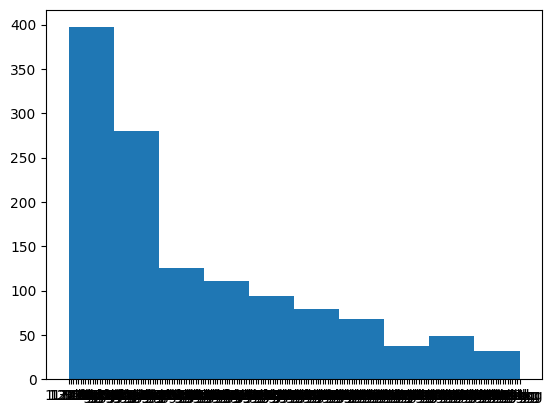

In [121]:
plt.hist(data["Weight"])

In [122]:
data["Weight"].value_counts().index[0]

'2.2kg'

In [123]:
data["Weight"].replace(to_replace="?",value=data["Weight"].value_counts().index[0],
                       inplace=True)

/tmp/ipykernel_19843/322094499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Weight"].replace(to_replace="?",value=data["Weight"].value_counts().index[0],


In [124]:
data["Weight"] = data["Weight"].apply(lambda x: float(x.split("kg")[0]))

In [125]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,13,3,13.3,26,85,8.0,14,80,8,1.37,71378.6832
1,13,3,13.3,13,64,8.0,13,45,8,1.34,47895.5232
2,5,1,15.6,15,58,8.0,21,54,2,1.86,30636.0000
3,13,3,15.4,36,111,16.0,31,95,8,1.83,135195.3360
4,13,3,13.3,26,99,8.0,21,84,8,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,6,2,14,16,77,4.0,14,47,4,1.80,33992.6400
1299,6,2,13.3,22,77,16.0,31,47,4,1.30,79866.7200
1300,6,1,14,4,16,2.0,6,6,4,1.50,12201.1200
1301,5,1,15.6,4,77,6.0,12,32,4,2.19,40705.9200


In [126]:
data["Inches"].replace(to_replace="?",value=data["Inches"].value_counts().index[0],
                       inplace=True)

/tmp/ipykernel_19843/3364775625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Inches"].replace(to_replace="?",value=data["Inches"].value_counts().index[0],


In [127]:
data["Inches"] = data["Inches"].astype("float64")

In [128]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [129]:
data.shape

(1244, 11)

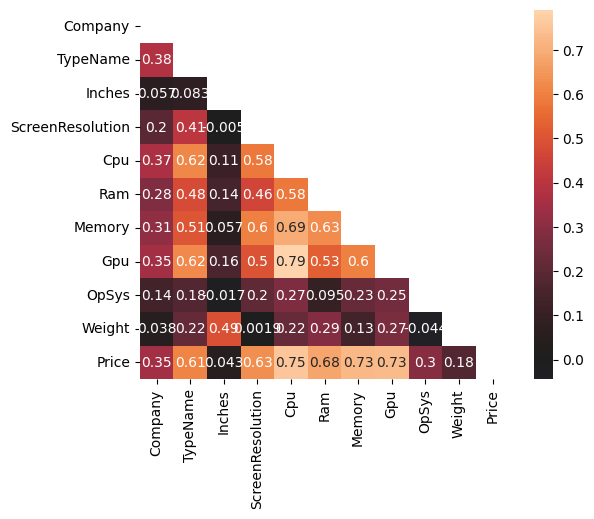

In [130]:
data_corr = data.corr()
upper_traingle_mask = np.triu(np.ones_like(data_corr,dtype=bool))
sns.heatmap(data=data_corr,center=0,annot=True,square=True,xticklabels=True,yticklabels=True,mask=upper_traingle_mask)
plt.show()

In [131]:
selected_features = list(data_corr[data_corr[data.columns[-1]] > 0.5].index)

In [132]:
refined_data = data[selected_features]

In [133]:
refined_data

,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,Price
0,3,26,85,8.0,14,80,71378.6832
1,3,13,64,8.0,13,45,47895.5232
2,1,15,58,8.0,21,54,30636.0000
3,3,36,111,16.0,31,95,135195.3360
4,3,26,99,8.0,21,84,96095.8080
...,...,...,...,...,...,...,...
1239,1,4,77,4.0,9,29,38378.6496
1240,2,16,77,4.0,14,47,33992.6400
1241,2,22,77,16.0,31,47,79866.7200
1242,1,4,16,2.0,6,6,12201.1200


In [134]:
X_transpose = np.array(refined_data.iloc[:,0:6])
y = np.array(refined_data.iloc[:,-1]).reshape(refined_data.shape[0],1)

(array([438., 435., 225.,  95.,  36.,   8.,   3.,   2.,   1.,   1.]),
 array([  9270.72,  40839.12,  72407.52, 103975.92, 135544.32, 167112.72,
        198681.12, 230249.52, 261817.92, 293386.32, 324954.72]),
 <BarContainer object of 10 artists>)

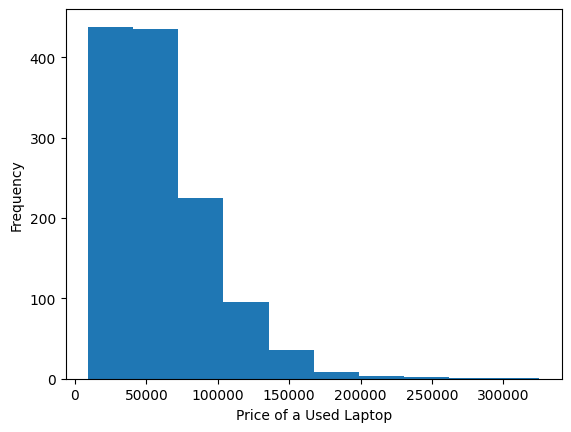

In [135]:
plt.xlabel("Price of a Used Laptop")
plt.ylabel("Frequency")
plt.hist(y)

/tmp/ipykernel_19843/4126059115.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y,fit=s.norm)


<Axes: xlabel='Price of a Used Laptop', ylabel='Density'>

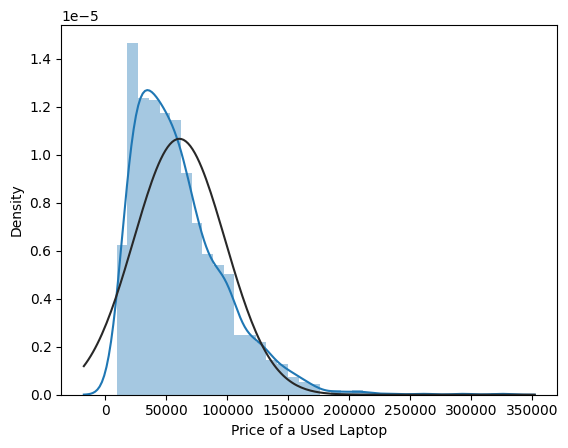

In [136]:
plt.xlabel("Price of a Used Laptop")
sns.distplot(y,fit=s.norm)

(array([ 14.,  72., 142., 178., 249., 263., 208.,  97.,  17.,   4.]),
 array([ 9.13461633,  9.49029881,  9.84598129, 10.20166377, 10.55734625,
        10.91302873, 11.26871121, 11.62439369, 11.98007617, 12.33575865,
        12.69144113]),
 <BarContainer object of 10 artists>)

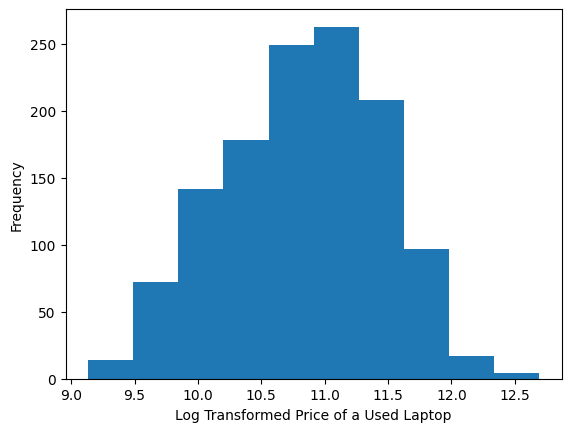

In [137]:
plt.xlabel("Log Transformed Price of a Used Laptop")
plt.ylabel("Frequency")
plt.hist(np.log(y))

/tmp/ipykernel_19843/428199229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(y),fit=s.norm)


<Axes: xlabel='Log Transformed Price of a Used Laptop', ylabel='Density'>

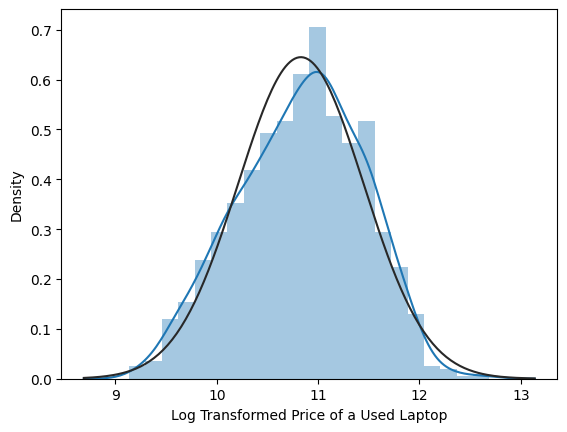

In [138]:
plt.xlabel("Log Transformed Price of a Used Laptop")
sns.distplot(np.log(y),fit=s.norm)

In [139]:
y = np.log(y)

In [140]:
y = np.log(y)
def mse(theta0,theta):

    return np.mean((y - (theta0 + np.matmul(X_transpose,theta)))**2)

In [141]:
def del_mse_by_del_theta(theta0,theta):

    error_transpose = np.transpose((theta0 + np.matmul(X_transpose,theta) - y))

    del_by_del_theta0 = np.mean(error_transpose)
    del_by_del_theta = (1/y.shape[0])*np.transpose(np.matmul(error_transpose,X_transpose))

    return [del_by_del_theta0,del_by_del_theta]

In [142]:
epsilon = 10**(-4)
epoch_counter = 0
theta0_initial = 0
theta_initial = np.zeros((X_transpose.shape[1],1))
tol = 10**(-5)

while True:

    initial_gradients = del_mse_by_del_theta(theta0_initial,theta_initial)

    theta0_final = theta0_initial - (epsilon * initial_gradients[0])
    theta_final = theta_initial - (epsilon * initial_gradients[1])

    mse_initial_value = mse(theta0_initial,theta_initial)
    mse_final_value = mse(theta0_final,theta_final)

    if abs(mse_initial_value - mse_final_value) < tol:
        break

    epoch_counter += 1

    theta0_initial = theta0_final
    theta_initial = theta_final

    print("Epoch # {}, MSE Value = {}".format(epoch_counter,mse_initial_value))

Epoch # 1, MSE Value = 5.670820625993309
Epoch # 2, MSE Value = 0.8074857913824878
Epoch # 3, MSE Value = 0.6825165244025325
Epoch # 4, MSE Value = 0.6779374596476008
Epoch # 5, MSE Value = 0.6764487208635731
Epoch # 6, MSE Value = 0.6750699901531308
Epoch # 7, MSE Value = 0.6737247493185665
Epoch # 8, MSE Value = 0.6724102601177103
Epoch # 9, MSE Value = 0.6711256796726034
Epoch # 10, MSE Value = 0.6698702339844258
Epoch # 11, MSE Value = 0.6686431709771008
Epoch # 12, MSE Value = 0.6674437587571982
Epoch # 13, MSE Value = 0.6662712850372722
Epoch # 14, MSE Value = 0.6651250566032573
Epoch # 15, MSE Value = 0.6640043987970966
Epoch # 16, MSE Value = 0.6629086550134811
Epoch # 17, MSE Value = 0.6618371862103026
Epoch # 18, MSE Value = 0.6607893704324401
Epoch # 19, MSE Value = 0.659764602348521
Epoch # 20, MSE Value = 0.6587622928002969
Epoch # 21, MSE Value = 0.6577818683642978
Epoch # 22, MSE Value = 0.6568227709254216
Epoch # 23, MSE Value = 0.6558844572621397
Epoch # 24, MSE Value 